# Building a Handwritten Digits Classifier

In this Guided Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images. We will a datasets pre-loaded in Scikit-learn

In [1]:
from sklearn.datasets import load_digits 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#Importing the data
digits_data = load_digits()
data = pd.DataFrame(digits_data['data'])
labels = pd.Series(digits_data['target'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


Let's plot some of the images in the data set

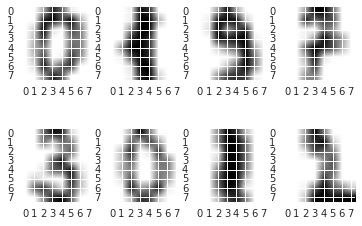

In [3]:
fig = plt.figure()
axes = []
images = [0, 99, 199, 299, 999, 1099, 1199, 1299]
for n in range(8):
    axes.append(fig.add_subplot(2,4,n+1))
for i in images:
    image = data.iloc[i]
    np_image = image.values
    np_image = np_image.reshape(8,8)
    axes[images.index(i)].imshow(np_image, cmap='gray_r')

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption.

Let's try a  KNeighborsClassifier

## K-Nearest Neighbors Model

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

def train(nn, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(nn):
    fold_accuracies = []
    kf = KFold(4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(nn, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return np.mean(fold_accuracies)
        
cross_validate(5)

0.9621665429349171

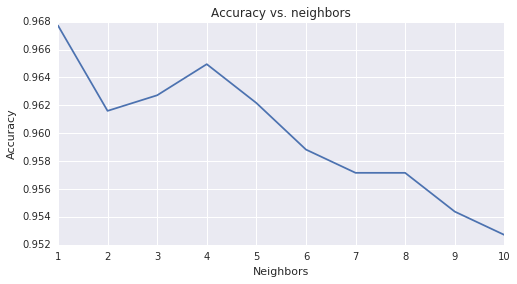

In [5]:
n_neighbors = [i + 1 for i in range(10)]
accuracies = []
for n in n_neighbors:
    accuracies.append(cross_validate(n))

plt.figure(figsize=(8,4))    
plt.title("Accuracy vs. neighbors")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.plot(n_neighbors, accuracies)

There are a few downsides to using k-nearest neighbors:

   - high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
   - no model representation to debug and explore


## Neural Network With One Hidden Layer

In [6]:
from sklearn.neural_network import MLPClassifier

def train(n, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=(n,))
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(n):
    fold_accuracies = []
    kf = KFold(4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return np.mean(fold_accuracies)
        
cross_validate(5)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.7216926503340757

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



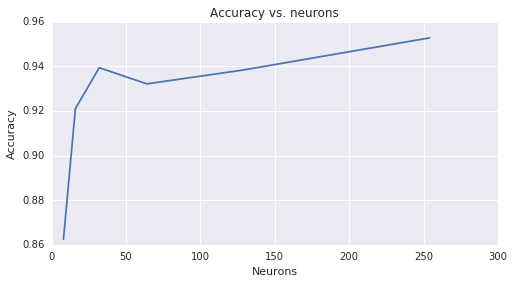

In [7]:
neurons = [8, 16, 32, 64, 128, 254]
accuracies = []
for n in neurons:
    accuracies.append(cross_validate(n))

plt.figure(figsize=(8,4))    
plt.title("Accuracy vs. neurons")
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.plot(neurons, accuracies)


### Analysis

Evaluating the overall performance, a KNearestNeighbot works better than a Neural Network with a single layer. To obtain the same results, the neural networks has to had 256 neurons.

## Neural Network With Two Hidden Layer

In [8]:
def train(n, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=(n,n))
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(n):
    fold_accuracies = []
    kf = KFold(4, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return np.mean(fold_accuracies)
        
cross_validate(5)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.7523620390992329

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



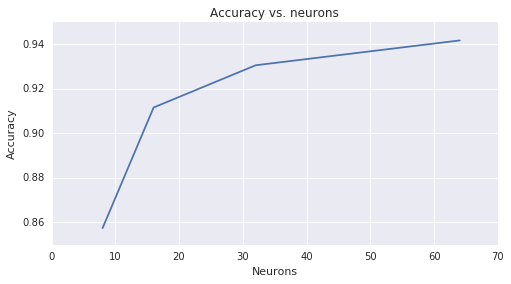

In [9]:
neurons_layers = [8, 16, 32, 64]
accuracies = []
for n in neurons_layers:
    accuracies.append(cross_validate(n))

plt.figure(figsize=(8,4))    
plt.title("Accuracy vs. neurons")
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.plot(neurons_layers, accuracies)

## Neural Network With Three Hidden Layer

In [10]:
def train(n, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n))
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(n):
    fold_accuracies = []
    kf = KFold(6, random_state=1)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(n, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return np.mean(fold_accuracies)
        
cross_validate(5)

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



0.6183277591973244

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



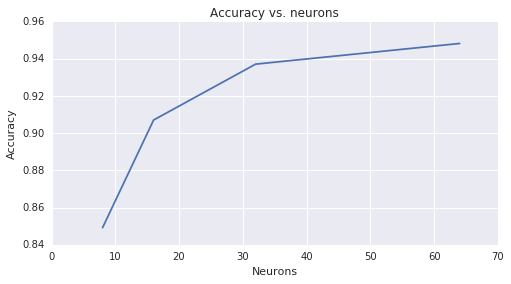

In [11]:
neurons_layers = [8, 16, 32, 64]
accuracies = []
for n in neurons_layers:
    accuracies.append(cross_validate(n))

plt.figure(figsize=(8,4))    
plt.title("Accuracy vs. neurons")
plt.xlabel("Neurons")
plt.ylabel("Accuracy")
plt.plot(neurons_layers, accuracies)


## Summary

Having more layers and more neurons tends to improve the network's performance but also tend tend to increment the time execution.
